Kendall W über die Dimensionen


# =====================================================================
# 0. Setup: Pakete und Daten
# =====================================================================

In [21]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)
library(knitr)
library(irr)
library(tikzDevice)
library(scales)
setwd("/Users/joern.ahlert/Desktop/Bachelorarbeit")

df <- read.csv(file.path("technische Umsetzung", "LLM as a judge",
                         "llm_evaluation_results_100_episodes_temp1.0.csv"))
                         
View(df)

Episode,Frage_Nr,Frage,Kontextverständnis_Score,Kohärenz_Score,Angemessenheit_Score,Gesamtplausibilität_Score
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,3.19,5.00,5.00,4.76
1,2,Warum kann der Kaffernbüffel auch in relativ trock...,4.62,5.00,4.61,3.00
1,3,Wie verändert sich das Verhalten des Kaffernbüffel...,4.78,5.00,5.00,3.76
1,4,Weshalb sind Bullen nicht Teil des inneren Sozialg...,4.50,5.00,5.00,4.47
1,5,Welche Rolle spielt die Position eines Tieres inne...,4.61,5.00,5.00,3.89
1,6,Aus welchen Gründen könnten weibliche Kaffernbüffe...,4.73,4.99,5.00,3.38
1,7,Welche Auswirkungen kann die Stellung eines Tieres...,5.00,5.00,5.00,5.00
1,8,Weshalb sind große Herden in bestimmten Jahreszeit...,5.00,5.00,5.00,3.07
2,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,3.28,5.00,5.00,4.91


# =====================================================================
# 1. Deskriptive Statistik – dimensionsspezifisch
# =====================================================================


In [22]:
# Aggregierten Score direkt auf df berechnen (für alle 800 Zeilen)
df$Aggregierter_Score <- 0.3 * df$Kontextverständnis_Score +
                        0.4 * df$Kohärenz_Score +
                        0.3 * df$Angemessenheit_Score

# Deskriptive Statistik über alle 800 Einzelmessungen (8 Fragen × 100 Episoden)
deskriptiv_dim <- data.frame(
  Dimension = c("Angemessenheit",
                "Kohärenz",
                "Kontextverständnis",
                "Gewichtete Gesamtplausibilität",
                "Plausibilität (Zhang)"),
  Min    = c(min(df$Angemessenheit_Score, na.rm = TRUE),
             min(df$Kohärenz_Score, na.rm = TRUE),
             min(df$Kontextverständnis_Score, na.rm = TRUE),
             min(df$Aggregierter_Score, na.rm = TRUE),
             min(df$Gesamtplausibilität_Score, na.rm = TRUE)),
  Max    = c(max(df$Angemessenheit_Score, na.rm = TRUE),
             max(df$Kohärenz_Score, na.rm = TRUE),
             max(df$Kontextverständnis_Score, na.rm = TRUE),
             max(df$Aggregierter_Score, na.rm = TRUE),
             max(df$Gesamtplausibilität_Score, na.rm = TRUE)),
  M      = c(mean(df$Angemessenheit_Score, na.rm = TRUE),
             mean(df$Kohärenz_Score, na.rm = TRUE),
             mean(df$Kontextverständnis_Score, na.rm = TRUE),
             mean(df$Aggregierter_Score, na.rm = TRUE),
             mean(df$Gesamtplausibilität_Score, na.rm = TRUE)),
  Median = c(median(df$Angemessenheit_Score, na.rm = TRUE),
             median(df$Kohärenz_Score, na.rm = TRUE),
             median(df$Kontextverständnis_Score, na.rm = TRUE),
             median(df$Aggregierter_Score, na.rm = TRUE),
             median(df$Gesamtplausibilität_Score, na.rm = TRUE)),
  SD     = c(sd(df$Angemessenheit_Score, na.rm = TRUE),
             sd(df$Kohärenz_Score, na.rm = TRUE),
             sd(df$Kontextverständnis_Score, na.rm = TRUE),
             sd(df$Aggregierter_Score, na.rm = TRUE),
             sd(df$Gesamtplausibilität_Score, na.rm = TRUE))
)

kable(deskriptiv_dim, digits = 2,
      caption = "Deskriptive Statistik der LLM-Scores (800 Einzelmessungen: 8 Fragen × 100 Iterationen).")


# =====================================================================
# 2. TABELLE 2: Deskriptive Statistik – pro Frage aggregiert (8 Werte)
# =====================================================================

# Pro Frage über 100 Iterationen mitteln
df_agg_per_frage <- df %>%
  group_by(Frage_Nr) %>%
  summarise(
    Angemessenheit = mean(Angemessenheit_Score, na.rm = TRUE),
    Kohärenz = mean(Kohärenz_Score, na.rm = TRUE),
    Kontextverständnis = mean(Kontextverständnis_Score, na.rm = TRUE),
    `Gewichtete Gesamtplausibilität` = mean(Aggregierter_Score, na.rm = TRUE),
    `Plausibilität (Zhang)` = mean(Gesamtplausibilität_Score, na.rm = TRUE)
  )

# Deskriptive Statistik über die 8 Fragen
deskriptiv_agg <- data.frame(
  Dimension = c("Angemessenheit",
                "Kohärenz",
                "Kontextverständnis",
                "Gewichtete Gesamtplausibilität",
                "Plausibilität (Zhang)"),
  Min    = c(min(df_agg_per_frage$Angemessenheit, na.rm = TRUE),
             min(df_agg_per_frage$Kohärenz, na.rm = TRUE),
             min(df_agg_per_frage$Kontextverständnis, na.rm = TRUE),
             min(df_agg_per_frage$`Gewichtete Gesamtplausibilität`, na.rm = TRUE),
             min(df_agg_per_frage$`Plausibilität (Zhang)`, na.rm = TRUE)),
  Max    = c(max(df_agg_per_frage$Angemessenheit, na.rm = TRUE),
             max(df_agg_per_frage$Kohärenz, na.rm = TRUE),
             max(df_agg_per_frage$Kontextverständnis, na.rm = TRUE),
             max(df_agg_per_frage$`Gewichtete Gesamtplausibilität`, na.rm = TRUE),
             max(df_agg_per_frage$`Plausibilität (Zhang)`, na.rm = TRUE)),
  M      = c(mean(df_agg_per_frage$Angemessenheit, na.rm = TRUE),
             mean(df_agg_per_frage$Kohärenz, na.rm = TRUE),
             mean(df_agg_per_frage$Kontextverständnis, na.rm = TRUE),
             mean(df_agg_per_frage$`Gewichtete Gesamtplausibilität`, na.rm = TRUE),
             mean(df_agg_per_frage$`Plausibilität (Zhang)`, na.rm = TRUE)),
  Median = c(median(df_agg_per_frage$Angemessenheit, na.rm = TRUE),
             median(df_agg_per_frage$Kohärenz, na.rm = TRUE),
             median(df_agg_per_frage$Kontextverständnis, na.rm = TRUE),
             median(df_agg_per_frage$`Gewichtete Gesamtplausibilität`, na.rm = TRUE),
             median(df_agg_per_frage$`Plausibilität (Zhang)`, na.rm = TRUE)),
  SD     = c(sd(df_agg_per_frage$Angemessenheit, na.rm = TRUE),
             sd(df_agg_per_frage$Kohärenz, na.rm = TRUE),
             sd(df_agg_per_frage$Kontextverständnis, na.rm = TRUE),
             sd(df_agg_per_frage$`Gewichtete Gesamtplausibilität`, na.rm = TRUE),
             sd(df_agg_per_frage$`Plausibilität (Zhang)`, na.rm = TRUE))
)

kable(deskriptiv_agg, digits = 2,
      caption = "Deskriptive Statistik der LLM-Scores (pro Frage über 100 Iterationen gemittelt).")



Table: Deskriptive Statistik der LLM-Scores (800 Einzelmessungen: 8 Fragen × 100 Iterationen).

|Dimension                      |  Min| Max|    M| Median|   SD|
|:------------------------------|----:|---:|----:|------:|----:|
|Angemessenheit                 | 4.61|   5| 4.95|   5.00| 0.13|
|Kohärenz                       | 4.97|   5| 5.00|   5.00| 0.01|
|Kontextverständnis             | 2.21|   5| 4.56|   4.63| 0.49|
|Gewichtete Gesamtplausibilität | 4.16|   5| 4.85|   4.88| 0.15|
|Plausibilität (Zhang)          | 2.60|   5| 3.76|   3.45| 0.78|



Table: Deskriptive Statistik der LLM-Scores (pro Frage über 100 Iterationen gemittelt).

|Dimension                      |  Min|  Max|    M| Median|   SD|
|:------------------------------|----:|----:|----:|------:|----:|
|Angemessenheit                 | 4.61| 5.00| 4.95|   5.00| 0.14|
|Kohärenz                       | 4.98| 5.00| 5.00|   5.00| 0.01|
|Kontextverständnis             | 3.35| 5.00| 4.56|   4.67| 0.51|
|Gewichtete Gesamtplausibilität | 4.50| 5.00| 4.85|   4.90| 0.15|
|Plausibilität (Zhang)          | 2.98| 4.97| 3.76|   3.64| 0.72|

# Boxplot der Dimensionen und des aggregierten Scores

pdf 
  2

✓ TikZ-Datei erstellt: boxplot_llm_raw.tex


pdf 
  2

✓ TikZ-Datei erstellt: boxplot_llm_agg.tex


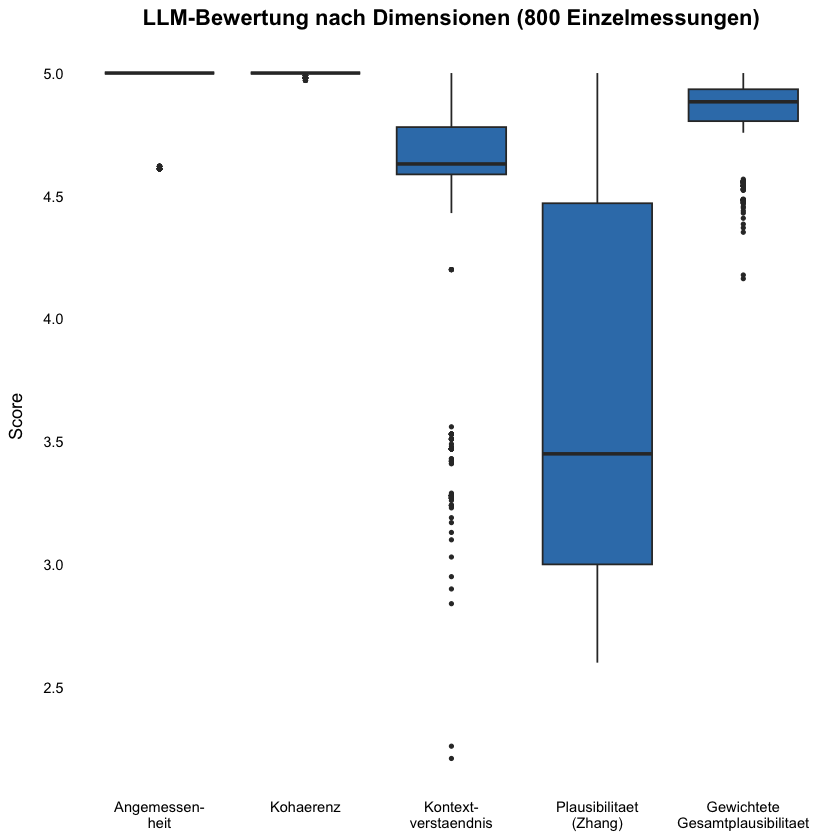


✓ Beide Boxplots erfolgreich erstellt!


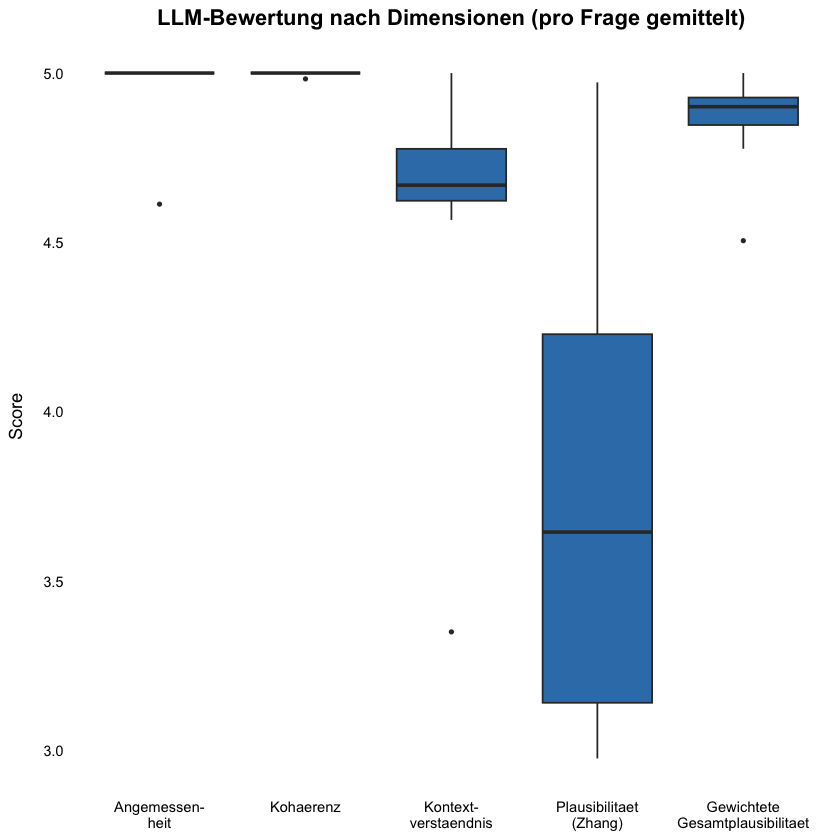

In [23]:
# =====================================================================
# BOXPLOT 1: Alle 800 Rohwerte
# =====================================================================

# Daten ins Long-Format (alle 800 Werte)
df_long_raw <- df %>%
  select(Angemessenheit_Score, Kohärenz_Score, Kontextverständnis_Score,
         Gesamtplausibilität_Score, Aggregierter_Score) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  ) %>%
  mutate(
    Dimension = case_when(
      Dimension == "Angemessenheit_Score" ~ "Angemessen-\nheit",
      Dimension == "Kohärenz_Score" ~ "Kohaerenz",
      Dimension == "Kontextverständnis_Score" ~ "Kontext-\nverstaendnis",
      Dimension == "Gesamtplausibilität_Score" ~ "Plausibilitaet\n(Zhang)",
      Dimension == "Aggregierter_Score" ~ "Gewichtete\nGesamtplausibilitaet",
      TRUE ~ Dimension
    ),
    Dimension = factor(Dimension, levels = c(
      "Angemessen-\nheit",
      "Kohaerenz",
      "Kontext-\nverstaendnis",
      "Plausibilitaet\n(Zhang)",
      "Gewichtete\nGesamtplausibilitaet"
    ))
  )

# LaTeX-Pfad für tikzDevice setzen
options(tikzLatex = "/Library/TeX/texbin/pdflatex")

# TikZ-Export für Boxplot 1
tikz(file = "boxplot_llm_raw.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)

p1 <- ggplot(df_long_raw, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "LLM-Bewertung nach Dimensionen (800 Einzelmessungen)",
    x = NULL,
    y = "Score"
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = scales::number_format(accuracy = 0.1)
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank()
  )

print(p1)
dev.off()

cat("✓ TikZ-Datei erstellt: boxplot_llm_raw.tex\n")

# Plot auch anzeigen
p1

# =====================================================================
# BOXPLOT 2: 8 fragenspezifische Mittelwerte
# =====================================================================

# Daten ins Long-Format (8 Werte pro Dimension)
df_long_agg <- df_agg_per_frage %>%
  select(-Frage_Nr) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  ) %>%
  mutate(
    Dimension = case_when(
      Dimension == "Angemessenheit" ~ "Angemessen-\nheit",
      Dimension == "Kohärenz" ~ "Kohaerenz",
      Dimension == "Kontextverständnis" ~ "Kontext-\nverstaendnis",
      Dimension == "Plausibilität (Zhang)" ~ "Plausibilitaet\n(Zhang)",
      Dimension == "Gewichtete Gesamtplausibilität" ~ "Gewichtete\nGesamtplausibilitaet",
      TRUE ~ Dimension
    ),
    Dimension = factor(Dimension, levels = c(
      "Angemessen-\nheit",
      "Kohaerenz",
      "Kontext-\nverstaendnis",
      "Plausibilitaet\n(Zhang)",
      "Gewichtete\nGesamtplausibilitaet"
    ))
  )

# TikZ-Export für Boxplot 2
tikz(file = "boxplot_llm_agg.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)

p2 <- ggplot(df_long_agg, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "LLM-Bewertung nach Dimensionen (pro Frage gemittelt)",
    x = NULL,
    y = "Score"
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = scales::number_format(accuracy = 0.1)
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank()
  )

print(p2)
dev.off()

cat("✓ TikZ-Datei erstellt: boxplot_llm_agg.tex\n")

# Plot auch anzeigen
p2

cat("\n✓ Beide Boxplots erfolgreich erstellt!\n")


# Violin-Plots für jedes Frage/Antwort-Paar

Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage1.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage2.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage3.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage4.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage5.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage6.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage7.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage8.tex

Alle 8 Violin-Plots wurden erstellt.


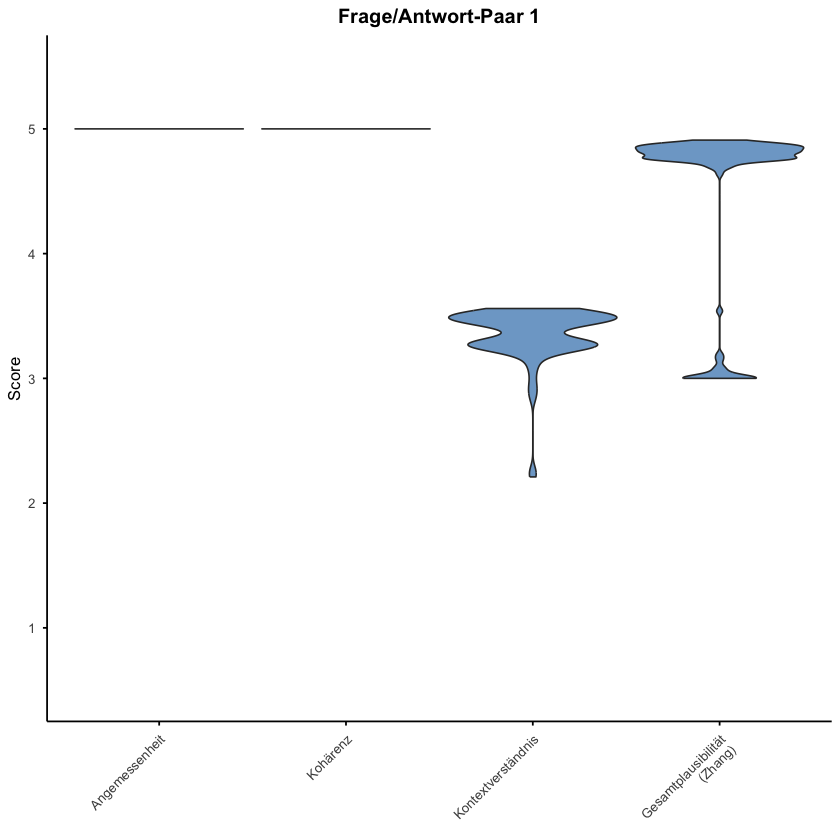

In [ ]:
# =====================================================================
# BOXPLOT 1: Alle 800 Rohwerte
# =====================================================================

# Daten ins Long-Format (alle 800 Werte)
df_long_raw <- df %>%
  select(Angemessenheit_Score, Kohärenz_Score, Kontextverständnis_Score,
         Gesamtplausibilität_Score, Aggregierter_Score) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  ) %>%
  mutate(
    Dimension = case_when(
      Dimension == "Angemessenheit_Score" ~ "Angemessen-\nheit",
      Dimension == "Kohärenz_Score" ~ "Kohaerenz",
      Dimension == "Kontextverständnis_Score" ~ "Kontext-\nverstaendnis",
      Dimension == "Gesamtplausibilität_Score" ~ "Plausibilitaet\n(Zhang)",
      Dimension == "Aggregierter_Score" ~ "Gewichtete\nGesamtplausibilitaet",
      TRUE ~ Dimension
    ),
    Dimension = factor(Dimension, levels = c(
      "Angemessen-\nheit",
      "Kohaerenz",
      "Kontext-\nverstaendnis",
      "Plausibilitaet\n(Zhang)",
      "Gewichtete\nGesamtplausibilitaet"
    ))
  )

# LaTeX-Pfad für tikzDevice setzen
options(tikzLatex = "/Library/TeX/texbin/pdflatex")

# TikZ-Export für Boxplot 1
tikz(file = "boxplot_llm_raw.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)

p1 <- ggplot(df_long_raw, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "LLM-Bewertung nach Dimensionen (800 Einzelmessungen)",
    x = NULL,
    y = "Score"
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = function(x) format(x, decimal.mark = ",", nsmall = 1)
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank(),
    axis.line    = element_line(color = "black", linewidth = 0.5),
    axis.ticks   = element_line(color = "black", linewidth = 0.5)
  )

print(p1)
dev.off()

cat("✓ TikZ-Datei erstellt: boxplot_llm_raw.tex\n")

# Plot auch anzeigen
p1

# =====================================================================
# BOXPLOT 2: 8 fragenspezifische Mittelwerte
# =====================================================================

# Daten ins Long-Format (8 Werte pro Dimension)
df_long_agg <- df_agg_per_frage %>%
  select(-Frage_Nr) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  ) %>%
  mutate(
    Dimension = case_when(
      Dimension == "Angemessenheit" ~ "Angemessen-\nheit",
      Dimension == "Kohärenz" ~ "Kohaerenz",
      Dimension == "Kontextverständnis" ~ "Kontext-\nverstaendnis",
      Dimension == "Plausibilität (Zhang)" ~ "Plausibilitaet\n(Zhang)",
      Dimension == "Gewichtete Gesamtplausibilität" ~ "Gewichtete\nGesamtplausibilitaet",
      TRUE ~ Dimension
    ),
    Dimension = factor(Dimension, levels = c(
      "Angemessen-\nheit",
      "Kohaerenz",
      "Kontext-\nverstaendnis",
      "Plausibilitaet\n(Zhang)",
      "Gewichtete\nGesamtplausibilitaet"
    ))
  )

# TikZ-Export für Boxplot 2
tikz(file = "boxplot_llm_agg.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)

p2 <- ggplot(df_long_agg, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "LLM-Bewertung nach Dimensionen (pro Frage gemittelt)",
    x = NULL,
    y = "Score"
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = function(x) format(x, decimal.mark = ",", nsmall = 1)
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank(),
    axis.line    = element_line(color = "black", linewidth = 0.5),
    axis.ticks   = element_line(color = "black", linewidth = 0.5)
  )

print(p2)
dev.off()

cat("✓ TikZ-Datei erstellt: boxplot_llm_agg.tex\n")

# Plot auch anzeigen
p2

cat("\n✓ Beide Boxplots erfolgreich erstellt!\n")


# =====================================================================
# 2. Intra-Rater-Reliabilität – Kendall's W
# =====================================================================

In [25]:
# Aggregierten Score berechnen
df$Aggregierter_Score <- 0.3 * df$Kontextverständnis_Score +
                        0.4 * df$Kohärenz_Score +
                        0.3 * df$Angemessenheit_Score

# Kendall's W für alle Metriken berechnen
metriken <- c("Angemessenheit_Score", "Kohärenz_Score", "Kontextverständnis_Score",
              "Gesamtplausibilität_Score", "Aggregierter_Score")

kendall_w_values <- sapply(metriken, function(metric) {
  mat <- dcast(df, Frage_Nr ~ Episode, value.var = metric)
  kendall(mat[, -1])$value
})

# Chi-Quadrat und p-Werte
m <- 100
n <- 8
chi2_values <- m * (n - 1) * kendall_w_values
p_values <- 1 - pchisq(chi2_values, df = n - 1)

# Ergebnistabelle
results <- data.frame(
  Dimension = c("Angemessenheit", "Kohärenz", "Kontextverständnis",
                "Plausibilität nach Zhang", "Aggregierter Score"),
  W = round(kendall_w_values, 4),
  p_formatted = ifelse(p_values < 0.001, "< 0.001",
                       ifelse(p_values < 0.01, "< 0.01",
                              ifelse(p_values < 0.05, "< 0.05", 
                                     round(p_values, 3)))),
  Signifikanz = ifelse(p_values < 0.001, "***",
                       ifelse(p_values < 0.01, "**",
                              ifelse(p_values < 0.05, "*", "n.s.")))
)

kable(results, digits = 3,
      caption = "Intra-Rater-Reliabilität des LLM-Judges (Kendall's $W$).")



Table: Intra-Rater-Reliabilität des LLM-Judges (Kendall's $W$).

|                          |Dimension                |     W|p_formatted |Signifikanz |
|:-------------------------|:------------------------|-----:|:-----------|:-----------|
|Angemessenheit_Score      |Angemessenheit           | 0.333|< 0.001     |***         |
|Kohärenz_Score            |Kohärenz                 | 0.320|< 0.001     |***         |
|Kontextverständnis_Score  |Kontextverständnis       | 0.698|< 0.001     |***         |
|Gesamtplausibilität_Score |Plausibilität nach Zhang | 0.696|< 0.001     |***         |
|Aggregierter_Score        |Aggregierter Score       | 0.810|< 0.001     |***         |